# Exploring the distributions

So far, we've learned how the **Distributions** work and how to generate them using the ``BaseDistribution`` class as well. 
In this tutorial we'll explore the distributions some more.

## Example 1: $\mathcal{N}(0, 1)$
For revision, let's generate some Gaussian data, $\mathcal{N}(0, 1)$, using ``pyMultiFit``. 
For comparison, we will also do the same with ``scipy.stats.norm``.

In [1]:
from scipy.stats import norm

from pymultifit.distributions import GaussianDistribution

fs = 14

The basic generation can be done by calling the class directly as it had default arguments built into it.

In [2]:
multifit_gaussian = GaussianDistribution()
scipy_gaussian = norm()

The **GaussianDistribution** takes four optional arguments,

* `amplitude`: The amplitude of the un-normalized Gaussian distribution. Defaults to `1.0`.
* `mu`: The mean of the Gaussian distribution. Defaults to `0.0`.
* `std`: The standard deviation of the Gaussian distribution. Defaults to `1.0`.
* `normalize`: Boolean value to set whether the distribution should be normalized or not. Defaults to `False`.

For now, we'll only focus on the **mean** and **standard_deviation** parameters, which are by default set to $0$ and $1$ respectively.
Next, we set up our array and get the Gaussian **PDFs** to generate the data.

In [3]:
import numpy as np

x = np.linspace(-5, 5, 10_000)

multifit_y = multifit_gaussian.pdf(x)
scipy_y = scipy_gaussian.pdf(x)

Finally, let's see the plots for both of these distributions,

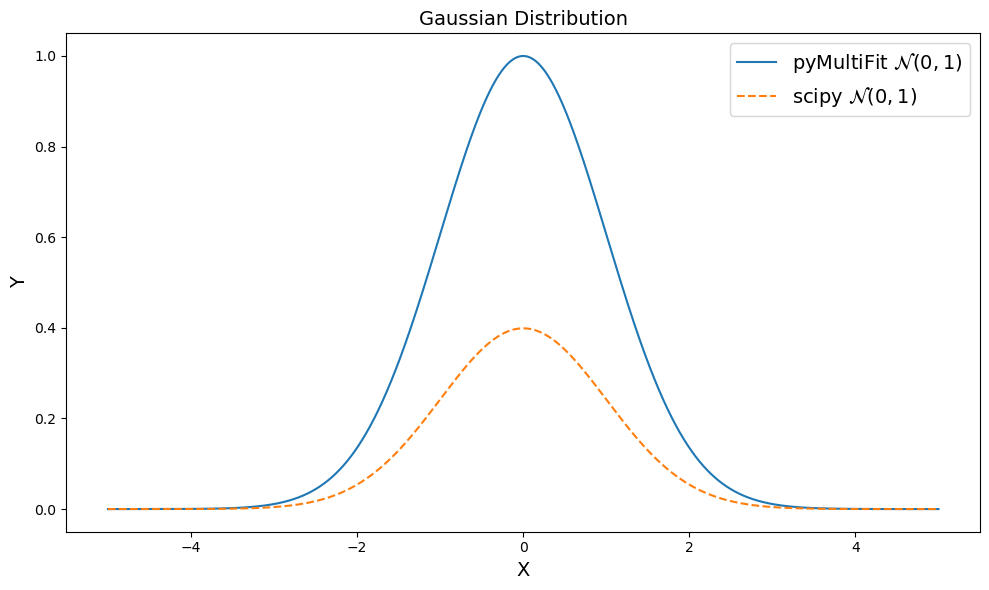

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(x, multifit_y, ls='-', label=r'pyMultiFit $\mathcal{N}(0, 1)$')
plt.plot(x, scipy_y, ls='--', label=r'scipy $\mathcal{N}(0, 1)$')
plt.xlabel('X', fontsize=fs)
plt.ylabel('Y', fontsize=fs)
plt.title('Gaussian Distribution', fontsize=fs)
plt.tight_layout()
plt.legend(loc='best', fontsize=fs)
plt.show()

But what's this? The distributions don't match.

This is intended, the distribution data created by the ``pyMultiFit`` library is intended to be **un-normalized**, more on this later.
In order to generate a **normalized** distribution, we can set the **normalize** argument to `True`.

In [5]:
multifit_gaussian = GaussianDistribution(normalize=True)
multifit_y = multifit_gaussian.pdf(x)

Now, if we re-plot both the distributions, we get,

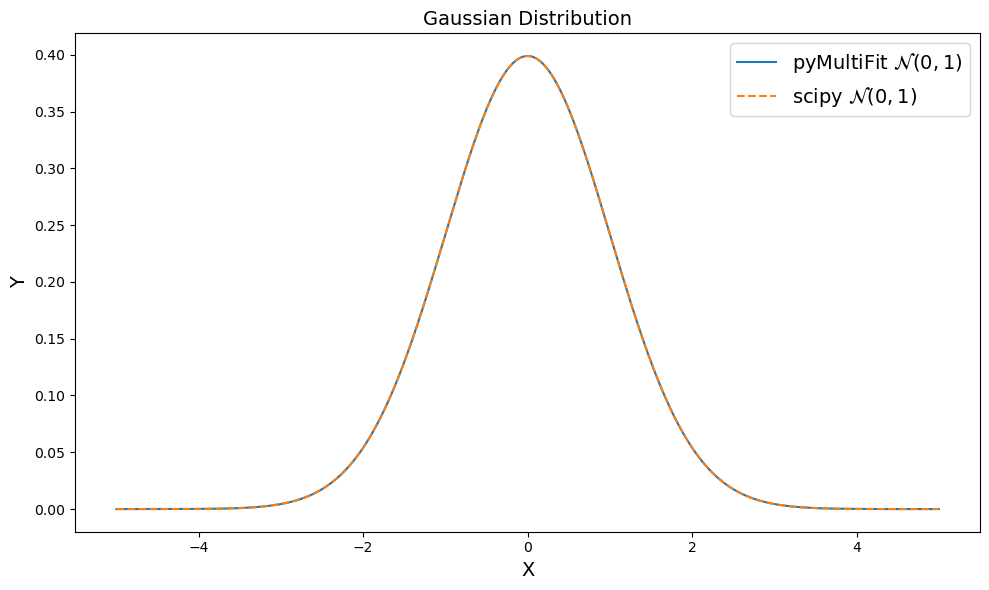

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(x, multifit_y, ls='-', label='pyMultiFit ' + r'$\mathcal{N}(0, 1)$')
plt.plot(x, scipy_y, ls='--', label='scipy ' + r'$\mathcal{N}(0, 1)$')
plt.xlabel('X', fontsize=fs)
plt.ylabel('Y', fontsize=fs)
plt.title('Gaussian Distribution', fontsize=fs)
plt.legend(loc='best', fontsize=fs)
plt.tight_layout()
plt.show()

Which is exactly what we wanted.

## Example 2: $\mathcal{N}(-2, 0.5)$

Now let's see how `pyMultiFit` handles user defined parameters for **GaussianDistribution**.

In [7]:
# define N(-2, 0.5) using pyMultiFit and scipy
multifit_gaussian = GaussianDistribution(mu=-2, std=0.5, normalize=True)
scipy_gaussian = norm(loc=-2, scale=0.5)

# generate their PDFs
multifit_y = multifit_gaussian.pdf(x)
scipy_y = scipy_gaussian.pdf(x)

Again, we set **normalize** keyword to `True` to get the normalized data. Now, let's see the two distributions again,

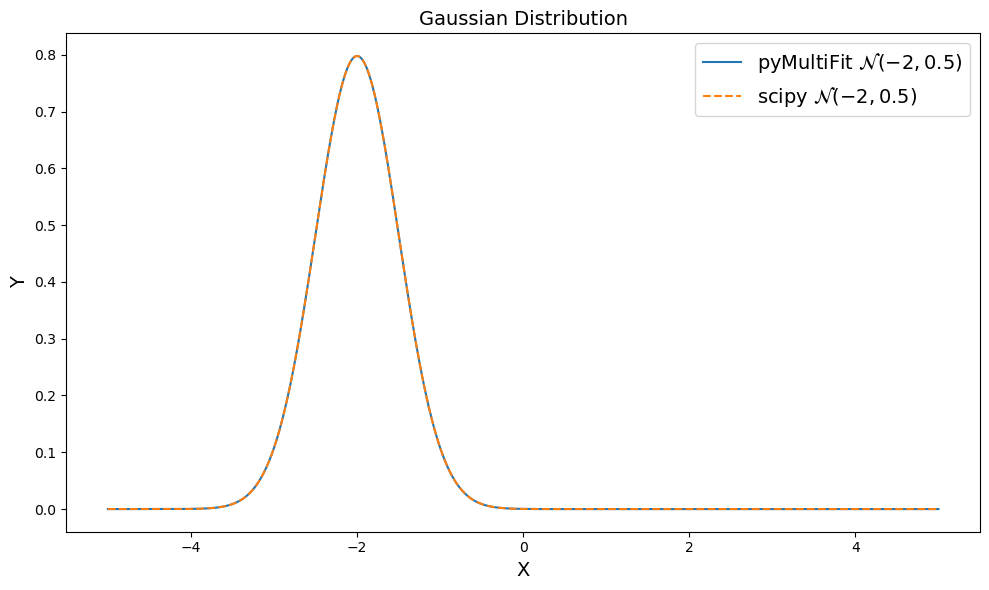

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(x, multifit_y, ls='-', label='pyMultiFit ' + r'$\mathcal{N}(-2, 0.5)$')
plt.plot(x, scipy_y, ls='--', label='scipy ' + r'$\mathcal{N}(-2, 0.5)$')
plt.xlabel('X', fontsize=fs)
plt.ylabel('Y', fontsize=fs)
plt.title('Gaussian Distribution', fontsize=fs)
plt.legend(loc='best', fontsize=fs)
plt.tight_layout()
plt.show()

Looks great!

## Example 3: $\mathcal{N}(3, 0.5, 0.5, \text{False})$

We've seen the usage of **mean**, **standard_deviation** and **normalize** parameters, now we'll learn about the **amplitude** parameter.

The standard Gaussian distribution is defined as,

$$
f(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right]
$$

However, this can also be written in terms of amplitude as,

$$
f(x; A, \mu, \sigma) = A\exp\left[-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right]
$$

where $A$ now replaces the normalization factor of the distribution as its **amplitude**.
The **amplitude** parameter forces the distribution to be **non-normalized** which often reflects the magnitude of the data.

To generate an amplitude-based Gaussian, we can provide the **amplitude** parameter and keep the **normalize** parameter as `False`.

In [9]:
# define amplitude, mean, and standard_deviation for ease of use
amplitude = 3
mean = 0.5
standard_deviation = 0.5

multifit_gaussian = GaussianDistribution(amplitude, mean, standard_deviation)
scipy_gaussian = norm(loc=mean, scale=standard_deviation)

The same can be achieved with scipy as well, but requires some tweakings,

In [10]:
# define the normalization factor to un-normalize scipy distribution
norm_ = np.sqrt(2 * np.pi * standard_deviation**2)

multifit_y = multifit_gaussian.pdf(x)
scipy_y = scipy_gaussian.pdf(x) * (amplitude * norm_)

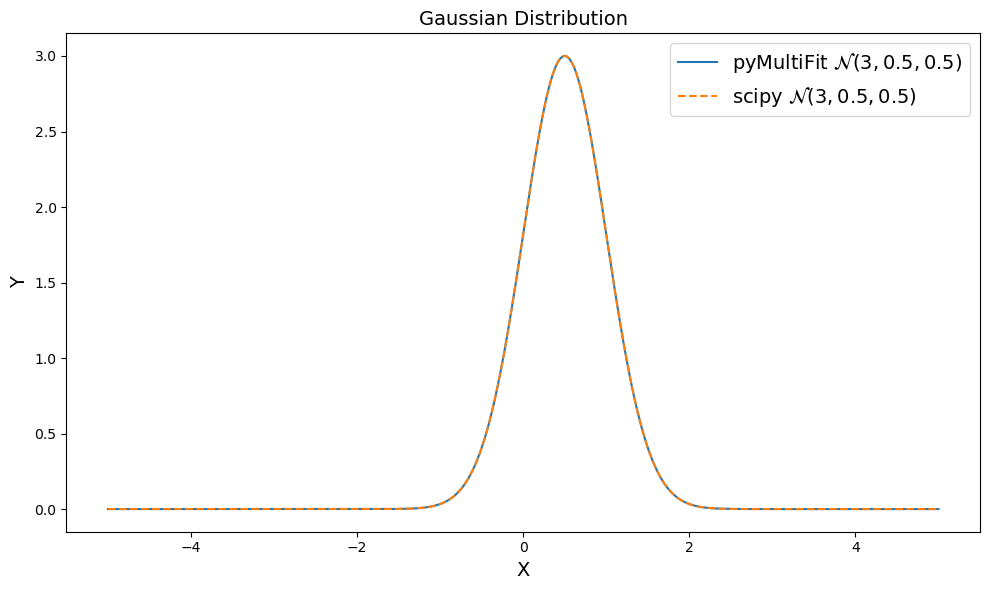

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(x, multifit_y, ls='-', label='pyMultiFit ' + r'$\mathcal{N}(3, 0.5, 0.5)$')
plt.plot(x, scipy_y, ls='--', label='scipy ' + r'$\mathcal{N}(3, 0.5, 0.5)$')
plt.xlabel('X', fontsize=fs)
plt.ylabel('Y', fontsize=fs)
plt.title('Gaussian Distribution', fontsize=fs)
plt.legend(loc='best', fontsize=fs)
plt.tight_layout()
plt.show()

By having a built-in **amplitude** parameter with **normalize** parameter, the library allows user to generate both **normalized** and **un-normalized** distributions on the go.

## Example 4: $\mathcal{N}(0, 1)$ using ``scipy`` syntax

The ``scipy`` library defines the standardized distribution and takes ``loc`` and ``scale`` as arguments that can provide any type of transformation required by the user.
Since most of the people are accustomed to that syntax, and it can take some time to get used to a new syntax, the ``pyMultiFit`` library also includes a ``classmethod`` for every distribution that encompasses the scipy arguments.
 

In [12]:
multifit_y = GaussianDistribution.scipy_like().pdf(x)
scipy_y = norm().pdf(x)

The ``scipy_like`` takes the exact arguments as the scipy distributions and in the same order to generate ``scipy_like`` distributions.
Since scipy generates normalized distributions, ``scipy_like`` does the same, it generates normalized distributions only.

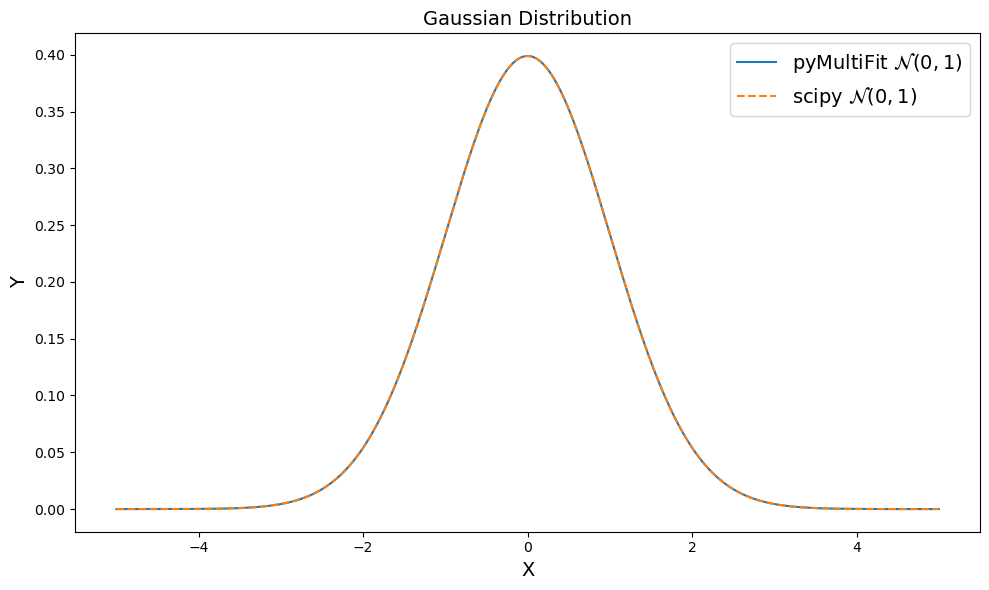

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(x, multifit_y, ls='-', label='pyMultiFit ' + r'$\mathcal{N}(0, 1)$')
plt.plot(x, scipy_y, ls='--', label='scipy ' + r'$\mathcal{N}(0, 1)$')
plt.xlabel('X', fontsize=fs)
plt.ylabel('Y', fontsize=fs)
plt.title('Gaussian Distribution', fontsize=fs)
plt.legend(loc='best', fontsize=fs)
plt.tight_layout()
plt.show()

This concludes the first exploration tutorial.